In [11]:
# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [18]:
#membaca gambar yang disimpan pada file
img = cv2.imread('cat.jpg')
#membaca gambar sebelumnya lalu diubah ke format rgb
cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((5,5),np.float32)/25
print(kernel)

# lakukan filtering
kucing_filter = cv2.filter2D(img,-1,kernel)

cv2.imshow('Cat', cat) #menampilkan gambar asli 
cv2.imshow('Kucing_Filter', kucing_filter) #menampilkan gambar hasil filtering
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


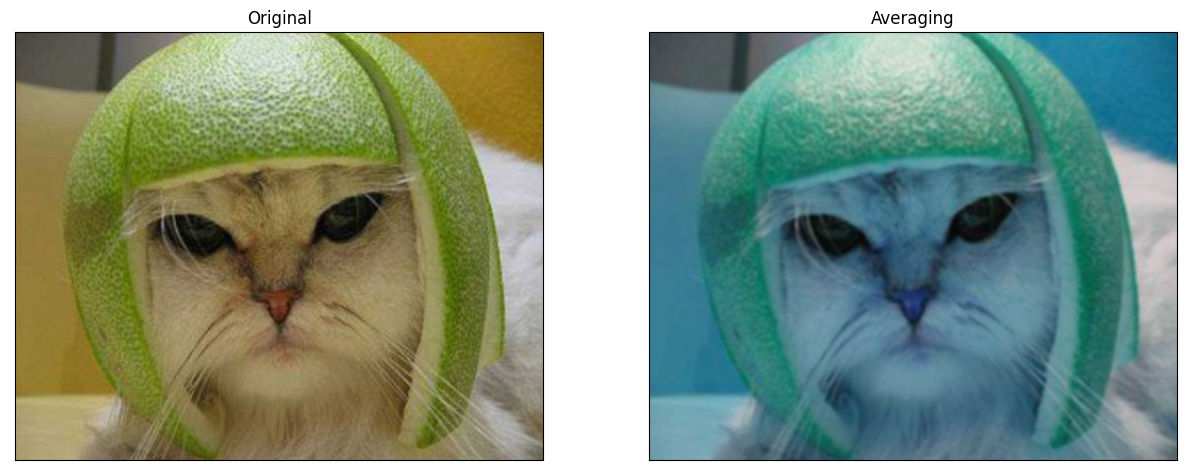

In [13]:
# perbesar ukuran hasil plotting jika diperlukan
plt.rcParams["figure.figsize"] = (15,15)

# plot pertama, gambar asli
plt.subplot(121),plt.imshow(cat),plt.title('Original')
plt.xticks([]), plt.yticks([])

# plot kedua, hasil filter
plt.subplot(122),plt.imshow(kucing_filter),
plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot semua dan tampilkan
plt.show()

In [14]:
kucing_blur = cv2.blur(img,(5,5)) #melakukan filtering blur pada gambar
# menampilkan gambar hasil filtering
cv2.imshow('Kucing_Blur', kucing_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# cara lain untuk membuat sebuah kernel dengan menggunakan np.matrix berukuran 3 x 3
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
print(kernel)

# melakukan filtering 
kucing_filter = cv2.filter2D(img,-1,kernel)

# menampilkan gambar hasil filtering
cv2.imshow('kucing_filter', kucing_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]
